In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import auc, average_precision_score
from pylab import rcParams
import seaborn as sns
from functools import reduce
import operator

In [2]:
sns.set()
# plt.style.use("dark_background")
rcParams['figure.figsize'] = 16, 10

In [3]:
EXPERIMENTS = [
    'L13UTR_vs_Shuffle',
    'L13UTR_vs_L15UTR',
    'L1_vs_Shuffle',
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
]

# Physical and chemical propertires based model

## ROC AUC

In [4]:
auc_l13utr_vs_random = pd.read_csv('L1/AUC__L13UTR_vs_Shuffle__Phys-Chem-Struct.csv')
auc_l13utr_vs_l15utr = pd.read_csv('L1/AUC__L13UTR_vs_L15UTR__Phys-Chem-Struct.csv')
auc_l1_vs_random = pd.read_csv('L1/AUC__L1_vs_Shuffle__Phys-Chem-Struct.csv')
auc_alu_vs_random = pd.read_csv('Alu/AUC__Alu_vs_Shuffle__Phys-Chem-Struct.csv')
auc_alu_vs_l1 = pd.read_csv('Alu/AUC__Alu_vs_L1__Phys-Chem-Struct.csv')
auc_alu_l1_vs_random = pd.read_csv('Alu/AUC__Alu_L1_vs_Shuffle__Phys-Chem-Struct.csv')
# Add more experiments here

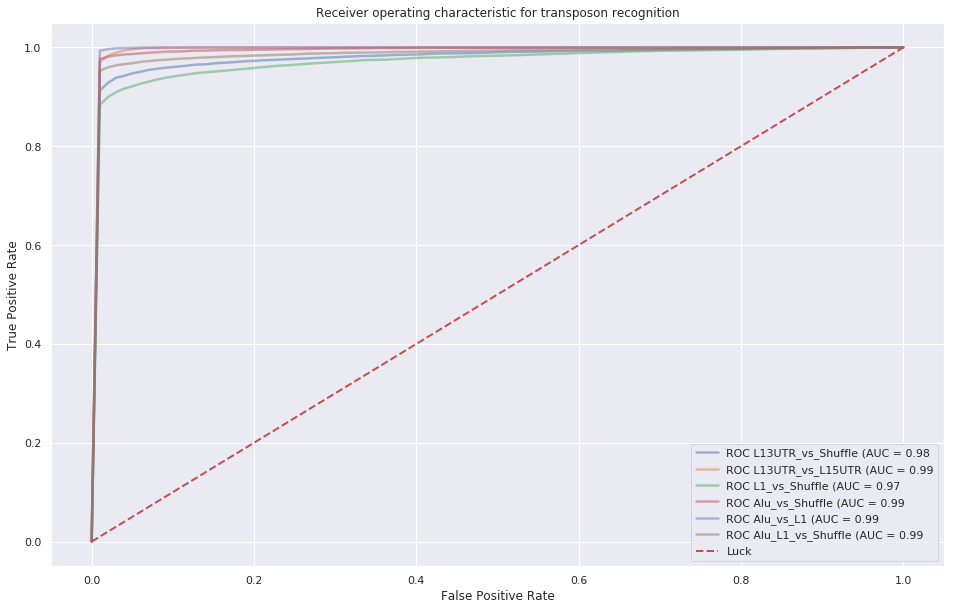

In [5]:
for name, df in zip([
    'L13UTR_vs_Shuffle',
    'L13UTR_vs_L15UTR',
    'L1_vs_Shuffle',
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
],[
    auc_l13utr_vs_random,
    auc_l13utr_vs_l15utr,
    auc_l1_vs_random,
    auc_alu_vs_random,
    auc_alu_vs_l1,
    auc_alu_l1_vs_random,
    # Add more experiments here
]):
    auc_score = auc(df.fpr, df.tpr)
    plt.plot(
        df.fpr,
        df.tpr,
        lw=2.5,
        alpha=0.5,
        label=f'ROC {name} (AUC = {auc_score:0.2f}'
    )
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    lw=2,
    color='r',
    label='Luck',
    alpha=1.0
)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Precision recall

In [6]:
pr_l13utr_vs_random = pd.read_csv('L1/Precision-Recall__L13UTR_vs_Shuffle__Phys-Chem-Struct.csv')
pr_l13utr_vs_l15utr = pd.read_csv('L1/Precision-Recall__L13UTR_vs_L15UTR__Phys-Chem-Struct.csv')
pr_l1_vs_random = pd.read_csv('L1/Precision-Recall__L1_vs_Shuffle__Phys-Chem-Struct.csv')
pr_alu_vs_random = pd.read_csv('Alu/Precision-Recall__Alu_vs_Shuffle__Phys-Chem-Struct.csv')
pr_alu_vs_l1 = pd.read_csv('Alu/Precision-Recall__Alu_vs_L1__Phys-Chem-Struct.csv')
pr_alu_l1_vs_random = pd.read_csv('Alu/Precision-Recall__Alu_L1_vs_Shuffle__Phys-Chem-Struct.csv')
# Add more experiments here

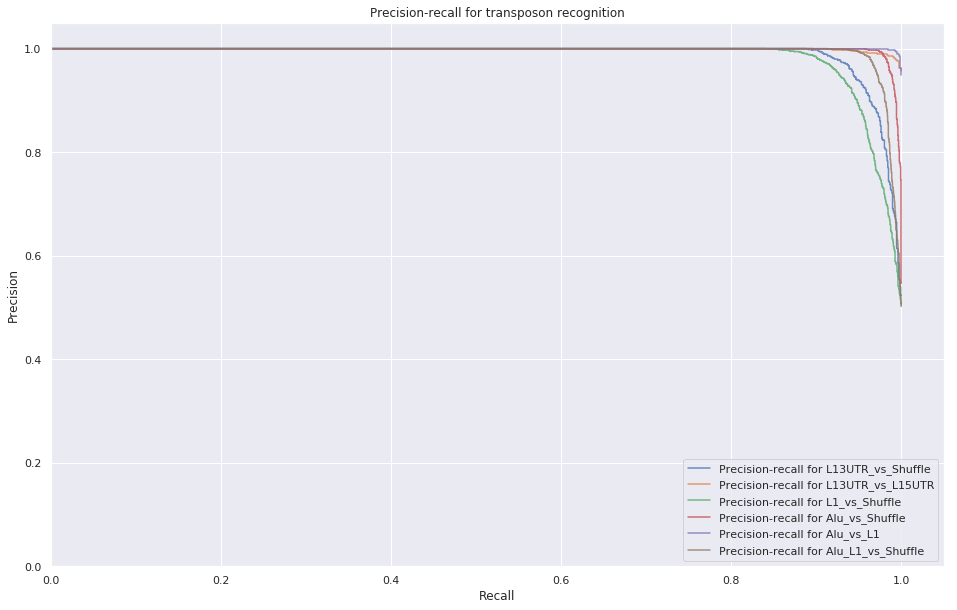

In [7]:
for name, df in zip([
    'L13UTR_vs_Shuffle',
    'L13UTR_vs_L15UTR',
    'L1_vs_Shuffle',
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
],[
    pr_l13utr_vs_random,
    pr_l13utr_vs_l15utr,
    pr_l1_vs_random,
    pr_alu_vs_random,
    pr_alu_vs_l1,
    pr_alu_l1_vs_random,
    # Add more experiments here
]):
    plt.step(
        df.recall,
        df.precision,
        alpha=0.8,
        where='post',
        label=f'Precision-recall for {name}'
    )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-recall for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Feature importances

In [8]:
fi_l13utr_vs_random = pd.read_csv('L1/Feature_importance__L13UTR_vs_Shuffle__Phys-Chem-Struct.csv')
fi_l13utr_vs_l15utr = pd.read_csv('L1/Feature_importance__L13UTR_vs_L15UTR__Phys-Chem-Struct.csv')
fi_l1_vs_random = pd.read_csv('L1/Feature_importance__L1_vs_Shuffle__Phys-Chem-Struct.csv')
fi_alu_vs_random = pd.read_csv('Alu/Feature_importance__Alu_vs_Shuffle__Phys-Chem-Struct.csv')
fi_alu_vs_l1 = pd.read_csv('Alu/Feature_importance__Alu_vs_L1__Phys-Chem-Struct.csv')
fi_alu_l1_vs_random = pd.read_csv('Alu/Feature_importance__Alu_L1_vs_Shuffle__Phys-Chem-Struct.csv')
# Add more experiments here

In [9]:
top_features = pd.unique(pd.concat([
    fi_l13utr_vs_random.iloc[:10],
    fi_l13utr_vs_l15utr.iloc[:10],
    fi_l1_vs_random.iloc[:10],
    fi_alu_vs_random.iloc[:10],
    fi_alu_vs_l1.iloc[:10],
    fi_alu_l1_vs_random.iloc[:10],
    # Add more experiments here
]).Feature_name)
to_plot_df = pd.concat([
    fi_l13utr_vs_random[fi_l13utr_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_l13utr_vs_l15utr[fi_l13utr_vs_l15utr.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_l1_vs_random[fi_l1_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_vs_random[fi_alu_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_vs_l1[fi_alu_vs_l1.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_l1_vs_random[fi_alu_l1_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    # Add more experiments here
], axis=1).fillna(0)
to_plot_df.columns=EXPERIMENTS
to_plot_df = to_plot_df.sort_values(to_plot_df.columns[0], ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



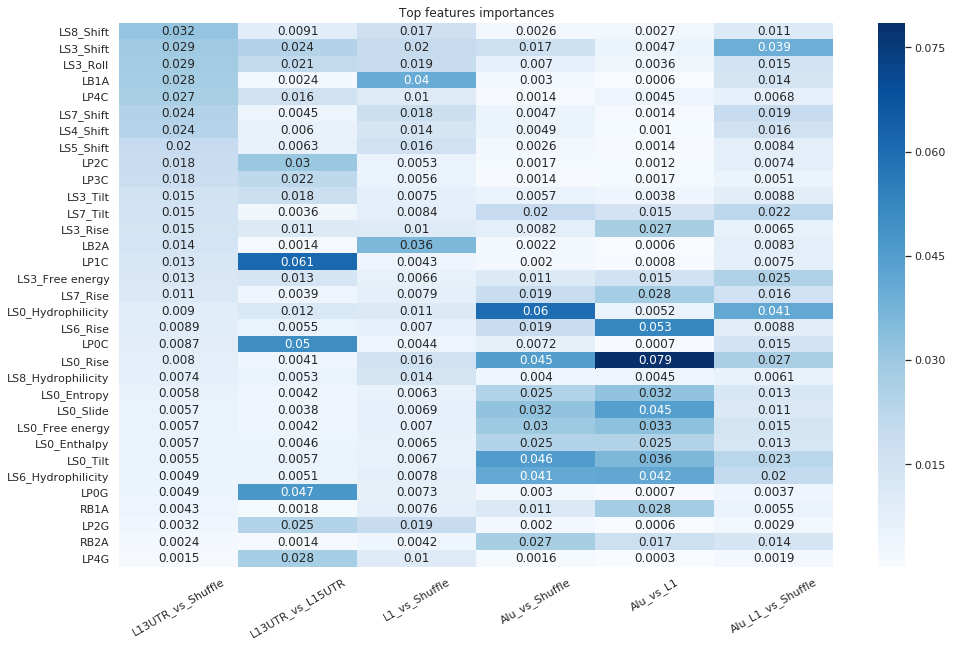

In [10]:
ax = plt.axes()
sns.heatmap(to_plot_df, annot=True, cmap='Blues');
ax.set_title('Top features importances');
plt.xticks(rotation=30);

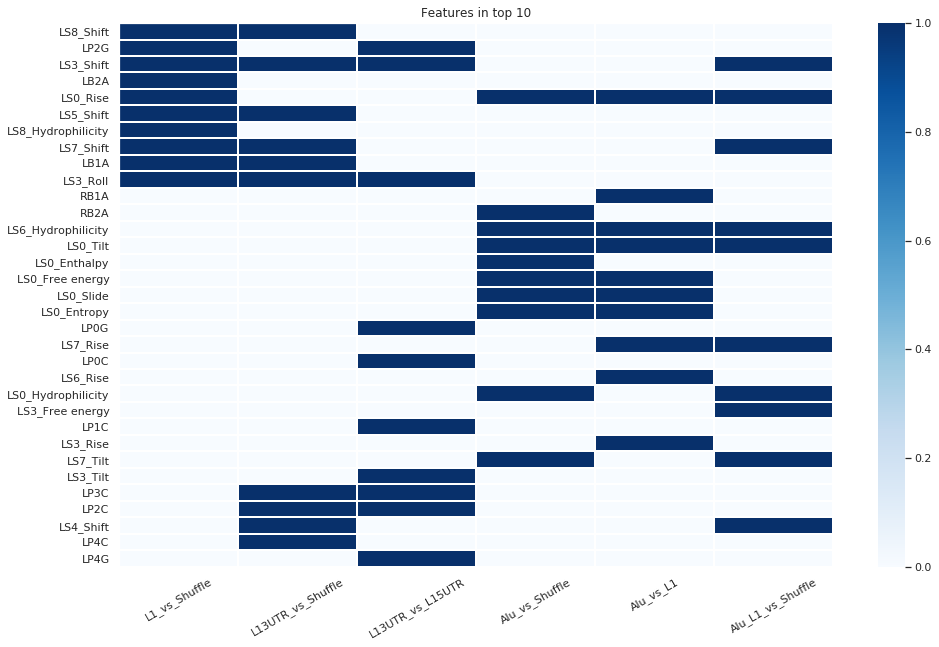

In [11]:
all_features = to_plot_df.index
top_10_experiment_features = {
    'L13UTR_vs_Shuffle': fi_l13utr_vs_random.iloc[:10].Feature_name.tolist(),
    'L13UTR_vs_L15UTR': fi_l13utr_vs_l15utr.iloc[:10].Feature_name.tolist(),
    'L1_vs_Shuffle': fi_l1_vs_random.iloc[:10].Feature_name.tolist(),
    'Alu_vs_Shuffle': fi_alu_vs_random.iloc[:10].Feature_name.tolist(),
    'Alu_vs_L1': fi_alu_vs_l1.iloc[:10].Feature_name.tolist(),
    'Alu_L1_vs_Shuffle': fi_alu_l1_vs_random.iloc[:10].Feature_name.tolist(),
    }
lines = []
for feature in all_features:
    lines.append({key: feature in top_10_experiment_features[key] and 1 or 0 for key in top_10_experiment_features})

binary_hm_df = pd.DataFrame(lines)
binary_hm_df.index = all_features
binary_hm_df = binary_hm_df[list(reversed(binary_hm_df.columns))]
binary_hm_df = binary_hm_df.sort_values('L1_vs_Shuffle', ascending=False)
ax = plt.axes()
axh = sns.heatmap(binary_hm_df, cmap='Blues', linewidths=1)
for _, spine in axh.spines.items():
    spine.set_visible(True)
ax.set_title('Features in top 10')
plt.xticks(rotation=30);

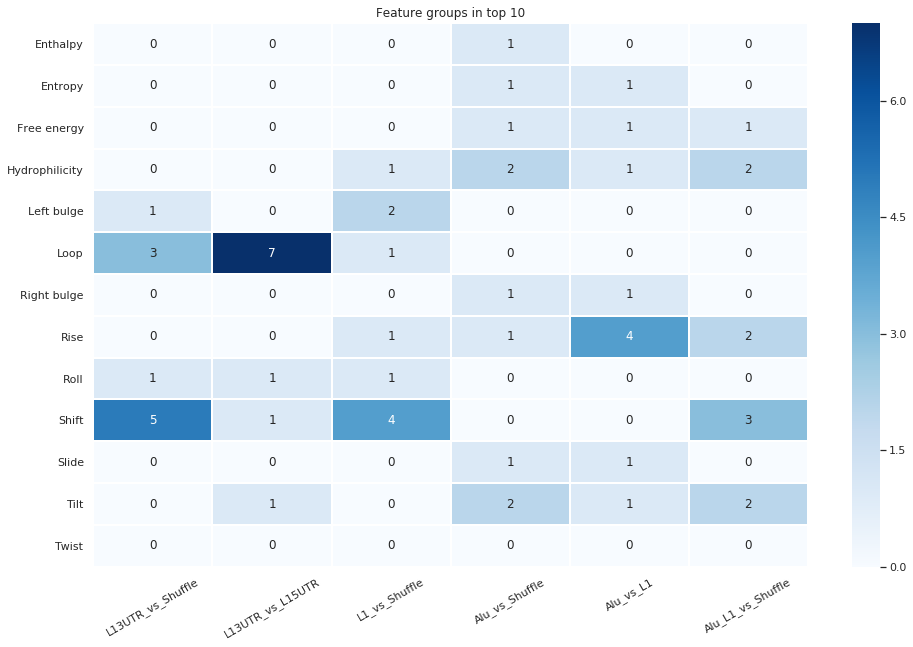

In [12]:
PROPERTIES = {
    'Shift': 'Shift',
    'Slide': 'Slide',
    'Rise': 'Rise',
    'Tilt': 'Tilt',
    'Roll': 'Roll',
    'Twist': 'Twist',
    'Hydrophilicity': 'Hydrophilicity',
    'Enthalpy': 'Enthalpy',
    'Entropy': 'Entropy',
    'Free energy': 'Free energy',
    'Loop': 'LP',
    'Left bulge': 'LB',
    'Right bulge': 'RB',
}

groups = list(PROPERTIES.keys())

lines = []
for experiment in EXPERIMENTS:
    lines.append({
        alias: sum(
            map(lambda x: PROPERTIES[alias] in x, top_10_experiment_features[experiment])
        ) for alias in PROPERTIES
    })
           
hm_df = pd.DataFrame(lines).T
hm_df.columns = EXPERIMENTS
ax = plt.axes()
sns.heatmap(hm_df, cmap='Blues', linewidths=1, annot=True)
ax.set_title('Feature groups in top 10')
plt.xticks(rotation=30);

In [13]:
top_10_experiment_features = {
    'L13UTR_vs_Shuffle': fi_l13utr_vs_random.iloc[:10].Feature_name.tolist(),
    'L13UTR_vs_L15UTR': fi_l13utr_vs_l15utr.iloc[:10].Feature_name.tolist(),
    'L1_vs_Shuffle': fi_l1_vs_random.iloc[:10].Feature_name.tolist(),
    'Alu_vs_Shuffle': fi_alu_vs_random.iloc[:10].Feature_name.tolist(),
    'Alu_vs_L1': fi_alu_vs_l1.iloc[:10].Feature_name.tolist(),
    'Alu_L1_vs_Shuffle': fi_alu_l1_vs_random.iloc[:10].Feature_name.tolist(),
    }

LS = []
LP = []
LB = []
RB = []
for i in range(9,-1,-1):
    LS.append('LS'+str(i))

for i in range(5):
    LP.append('LP'+str(i))

for i in range(3):
    LB.append('LB'+str(i))
    RB.append('RB'+str(i))

# X = LS+LP+LB+RB
X = LS+LP+LB+RB
# X = dict(zip(X, range(len(X))))
# lines = []
# for experiment in EXPERIMENTS:
#     for pos in X:
#         lines+= [{'Experiment': experiment, 'Position': X[pos]} for _ in range(
#             sum(map(lambda x: pos in x or 0, top_10_experiment_features[experiment]))
#         )]
lines = []  
for experiment in EXPERIMENTS:
    lines.append({pos: sum(map(lambda x: pos in x or 0, top_10_experiment_features[experiment])) for pos in X})

lines_df = pd.DataFrame(lines)
lines_df.index = EXPERIMENTS
# lines_df = lines_df.T

In [14]:
# grid = sns.FacetGrid(lines_df, col='Experiment', col_wrap=3, height=5)
# grid.map(plt.bar, 'Position', height=8)
# for ax in grid.axes.flat:
#     ax.set_xticklabels(X.keys(), rotation=90) # set new labels
#     ax.set_yticklabels(['']+ list(range(8))) # set new labels
# grid.set(xticks=np.arange(0,len(X)))

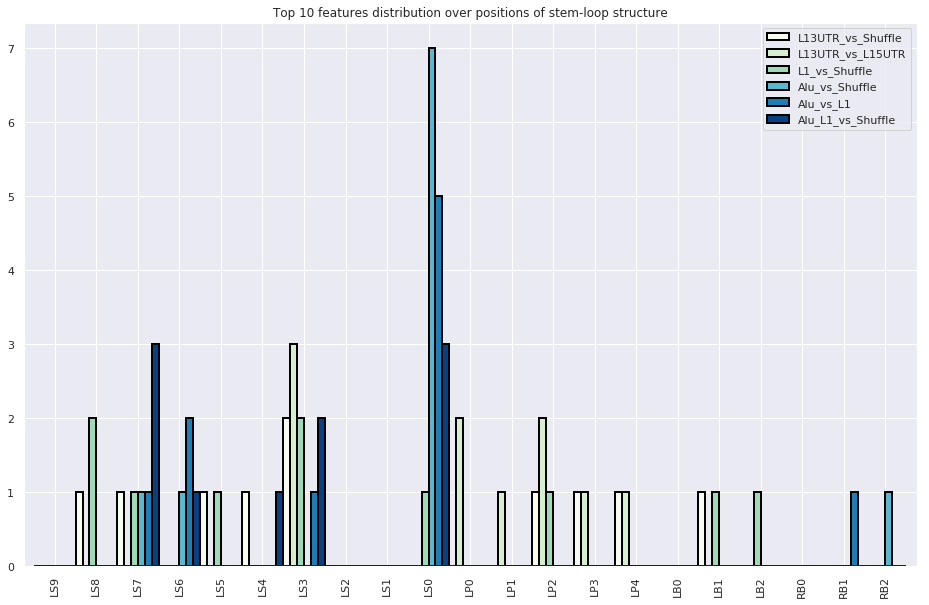

In [43]:
experiment_graph = lines_df[X].T.plot.bar(width=1, edgecolor='black', cmap='GnBu', lw=2)
experiment_graph.set_title('Top 10 features distribution over positions of stem-loop structure');

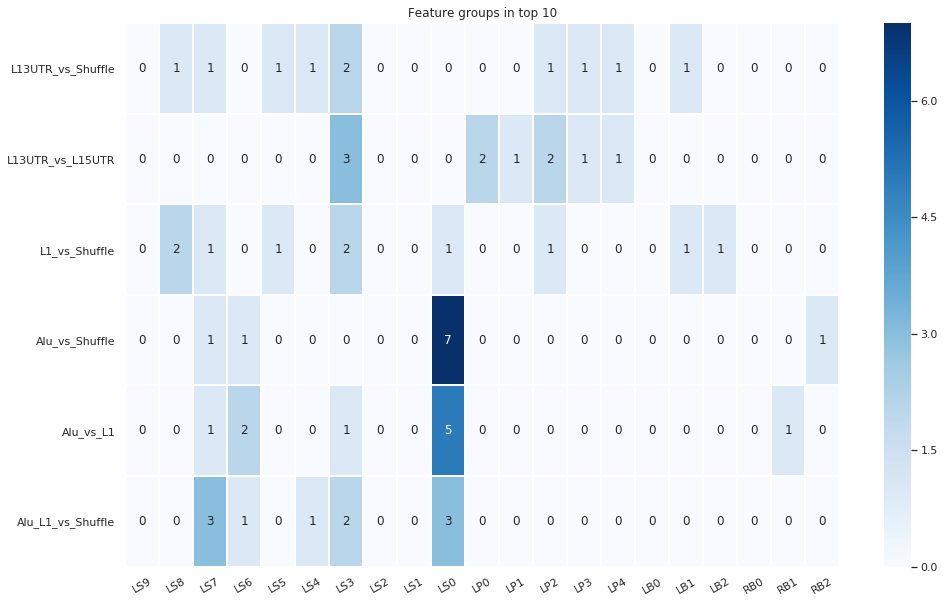

In [46]:
# experiment_graphs = lines_df[X].T.plot.bar(width=1)
ax = plt.axes()
sns.heatmap(lines_df[X], cmap='Blues', linewidths=1, annot=True)
ax.set_title('Feature groups in top 10')
plt.xticks(rotation=30);
# for exp_graph, label in zip(experiment_graphs, EXPERIMENTS):
# #     ax = exp_graph[0][0]
#     ax.set_title(label)
#     ax.set_xticklabels(lines_df.columns, rotation=30) # set new labels
#     ax.set_xticks(np.arange(0,len(X)+1))
#     ax.set_yticklabels(['']+ list(range(8))) # set new labels
#     ax.xticks(np.arange(0,len(X)))
# for experiment in lines_df.columns:
#     plt.bar(np.arange(0, len(lines_df.index)), lines_df[experiment])



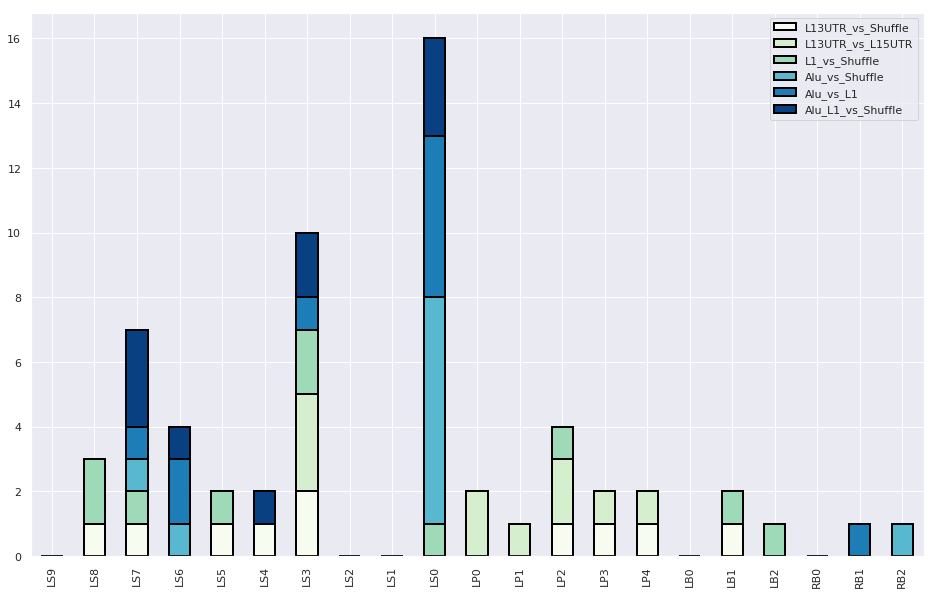

In [44]:
lines_df[X].T.plot(kind='bar', stacked=True, cmap='GnBu', edgecolor='black', lw=2)

# Stem-loop statistical model

## ROC AUC

In [18]:
auc_l13utr_vs_random = pd.read_csv('L1/AUC__L13UTR_vs_Shuffle__Stem-Loop_Stats.csv')
auc_l13utr_vs_l15utr = pd.read_csv('L1/AUC__L13UTR_vs_L15UTR__Stem-Loop_Stats.csv')
auc_l1_vs_random = pd.read_csv('L1/AUC__L1_vs_Shuffle__Stem-Loop_Stats.csv')
auc_alu_vs_random = pd.read_csv('Alu/AUC__Alu_vs_Shuffle__Stem-Loop_Stats.csv')
auc_alu_vs_l1 = pd.read_csv('Alu/AUC__Alu_vs_L1__Stem-Loop_Stats.csv')
auc_alu_l1_vs_random = pd.read_csv('Alu/AUC__Alu_L1_vs_Shuffle__Stem-Loop_Stats.csv')
# Add more experiments here

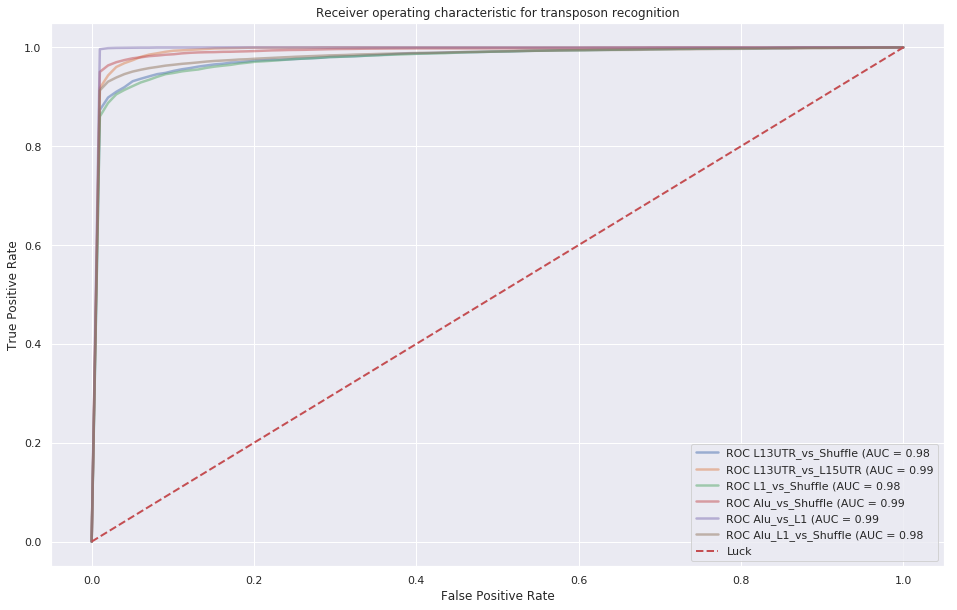

In [19]:
for name, df in zip([
    'L13UTR_vs_Shuffle',
    'L13UTR_vs_L15UTR',
    'L1_vs_Shuffle',
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
],[
    auc_l13utr_vs_random,
    auc_l13utr_vs_l15utr,
    auc_l1_vs_random,
    auc_alu_vs_random,
    auc_alu_vs_l1,
    auc_alu_l1_vs_random,
    # Add more experiments here
]):
    auc_score = auc(df.fpr, df.tpr)
    plt.plot(
        df.fpr,
        df.tpr,
        lw=2.5,
        alpha=0.5,
        label=f'ROC {name} (AUC = {auc_score:0.2f}'
    )
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    lw=2,
    color='r',
    label='Luck',
    alpha=1.0
)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Precision recall

In [20]:
pr_l13utr_vs_random = pd.read_csv('L1/Precision-Recall__L13UTR_vs_Shuffle__Stem-Loop_Stats.csv')
pr_l13utr_vs_l15utr = pd.read_csv('L1/Precision-Recall__L13UTR_vs_L15UTR__Stem-Loop_Stats.csv')
pr_l1_vs_random = pd.read_csv('L1/Precision-Recall__L1_vs_Shuffle__Stem-Loop_Stats.csv')
pr_alu_vs_random = pd.read_csv('Alu/Precision-Recall__Alu_vs_Shuffle__Stem-Loop_Stats.csv')
pr_alu_vs_l1 = pd.read_csv('Alu/Precision-Recall__Alu_vs_L1__Stem-Loop_Stats.csv')
pr_alu_l1_vs_random = pd.read_csv('Alu/Precision-Recall__Alu_L1_vs_Shuffle__Stem-Loop_Stats.csv')
# Add more experiments here

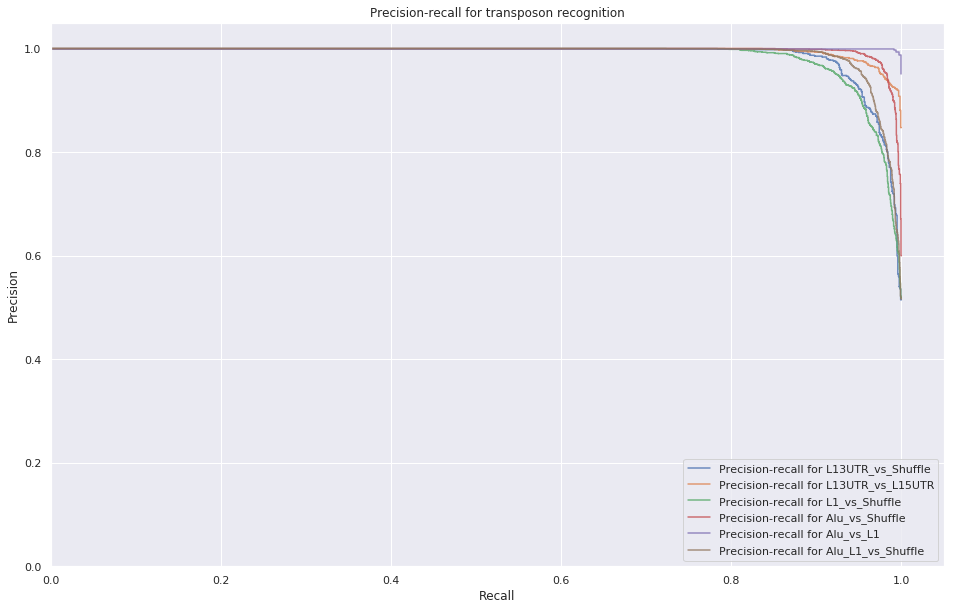

In [21]:
for name, df in zip([
    'L13UTR_vs_Shuffle',
    'L13UTR_vs_L15UTR',
    'L1_vs_Shuffle',
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
],[
    pr_l13utr_vs_random,
    pr_l13utr_vs_l15utr,
    pr_l1_vs_random,
    pr_alu_vs_random,
    pr_alu_vs_l1,
    pr_alu_l1_vs_random,
    # Add more experiments here
]):
    plt.step(
        df.recall,
        df.precision,
        alpha=0.8,
        where='post',
        label=f'Precision-recall for {name}'
    )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-recall for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Feature importances

In [22]:
fi_l13utr_vs_random = pd.read_csv('L1/Feature_importance__L13UTR_vs_Shuffle__Stem-Loop_Stats.csv')
fi_l13utr_vs_l15utr = pd.read_csv('L1/Feature_importance__L13UTR_vs_L15UTR__Stem-Loop_Stats.csv')
fi_l1_vs_random = pd.read_csv('L1/Feature_importance__L1_vs_Shuffle__Stem-Loop_Stats.csv')
fi_alu_vs_random = pd.read_csv('Alu/Feature_importance__Alu_vs_Shuffle__Stem-Loop_Stats.csv')
fi_alu_vs_l1 = pd.read_csv('Alu/Feature_importance__Alu_vs_L1__Stem-Loop_Stats.csv')
fi_alu_l1_vs_random = pd.read_csv('Alu/Feature_importance__Alu_L1_vs_Shuffle__Stem-Loop_Stats.csv')
# Add more experiments here

In [23]:
top_features = pd.unique(pd.concat([
    fi_l13utr_vs_random.iloc[:10],
    fi_l13utr_vs_l15utr.iloc[:10],
    fi_l1_vs_random.iloc[:10],
    fi_alu_vs_random.iloc[:10],
    fi_alu_vs_l1.iloc[:10],
    fi_alu_l1_vs_random.iloc[:10],
    # Add more experiments here
]).Feature_name)
to_plot_df = pd.concat([
    fi_l13utr_vs_random[fi_l13utr_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_l13utr_vs_l15utr[fi_l13utr_vs_l15utr.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_l1_vs_random[fi_l1_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_vs_random[fi_alu_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_vs_l1[fi_alu_vs_l1.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_l1_vs_random[fi_alu_l1_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    # Add more experiments here
], axis=1).fillna(0)
to_plot_df.columns=EXPERIMENTS
to_plot_df = to_plot_df.sort_values(to_plot_df.columns[0], ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



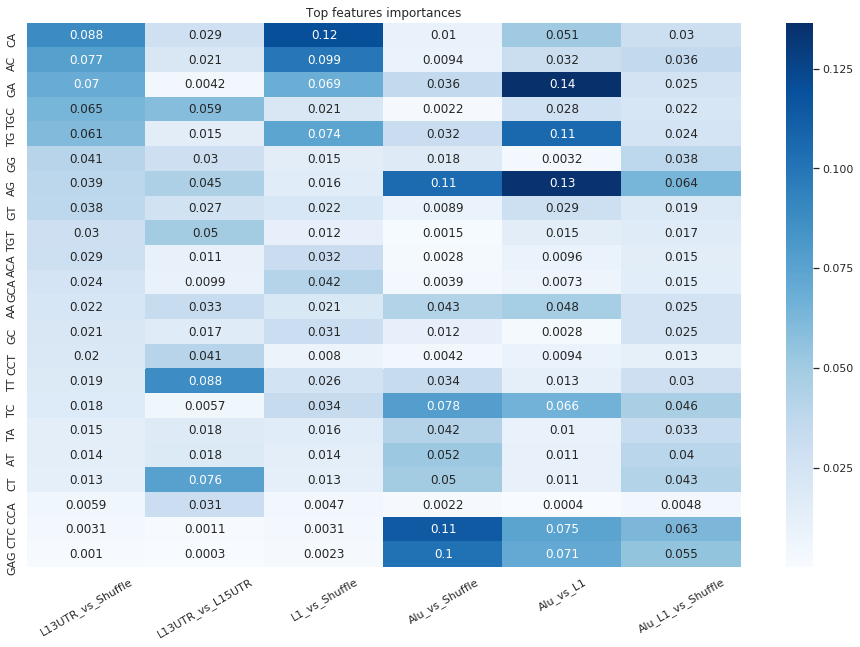

In [24]:
ax = plt.axes()
sns.heatmap(to_plot_df, annot=True, cmap='Blues');
ax.set_title('Top features importances');
plt.xticks(rotation=30);

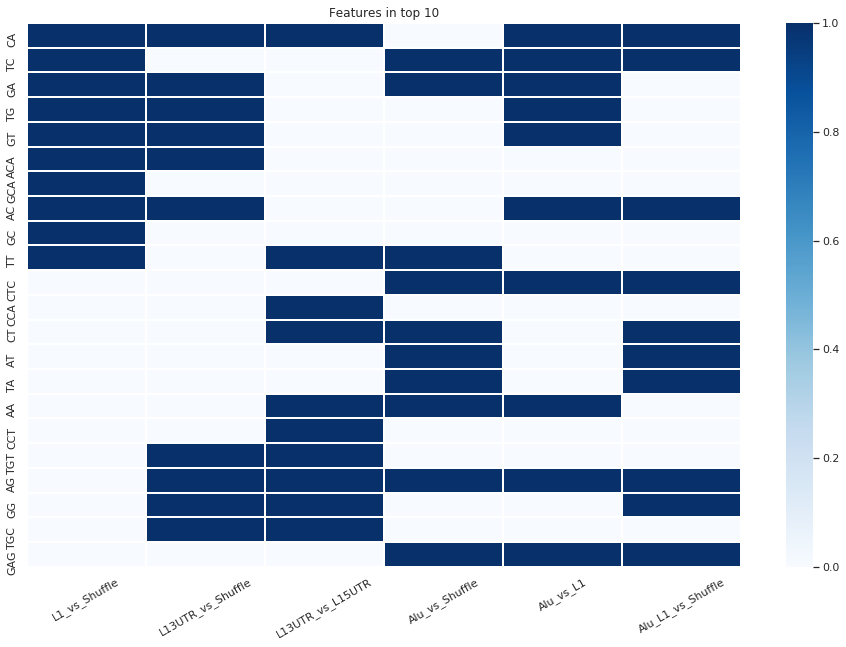

In [25]:
all_features = to_plot_df.index
top_10_experiment_features = {
    'L13UTR_vs_Shuffle': fi_l13utr_vs_random.iloc[:10].Feature_name.tolist(),
    'L13UTR_vs_L15UTR': fi_l13utr_vs_l15utr.iloc[:10].Feature_name.tolist(),
    'L1_vs_Shuffle': fi_l1_vs_random.iloc[:10].Feature_name.tolist(),
    'Alu_vs_Shuffle': fi_alu_vs_random.iloc[:10].Feature_name.tolist(),
    'Alu_vs_L1': fi_alu_vs_l1.iloc[:10].Feature_name.tolist(),
    'Alu_L1_vs_Shuffle': fi_alu_l1_vs_random.iloc[:10].Feature_name.tolist(),
    }
lines = []
for feature in all_features:
    lines.append({key: feature in top_10_experiment_features[key] and 1 or 0 for key in top_10_experiment_features})

binary_hm_df = pd.DataFrame(lines)
binary_hm_df.index = all_features
binary_hm_df = binary_hm_df[list(reversed(binary_hm_df.columns))]
binary_hm_df = binary_hm_df.sort_values('L1_vs_Shuffle', ascending=False)
ax = plt.axes()
sns.heatmap(binary_hm_df, cmap='Blues', linewidths=1)
ax.set_title('Features in top 10')
plt.xticks(rotation=30);

# 50 bp statistical model

## ROC AUC

In [26]:
auc_l13utr_vs_random = pd.read_csv('L1/AUC__L13UTR_vs_Shuffle__50b.p._Stats.csv')
auc_l13utr_vs_l15utr = pd.read_csv('L1/AUC__L13UTR_vs_L15UTR__50b.p._Stats.csv')
auc_l1_vs_random = pd.read_csv('L1/AUC__L1_vs_Shuffle__50b.p._Stats.csv')
auc_alu_vs_random = pd.read_csv('Alu/AUC__Alu_vs_Shuffle__50b.p._Stats.csv')
auc_alu_vs_l1 = pd.read_csv('Alu/AUC__Alu_vs_L1__50b.p._Stats.csv')
auc_alu_l1_vs_random = pd.read_csv('Alu/AUC__Alu_L1_vs_Shuffle__50b.p._Stats.csv')
# Add more experiments here

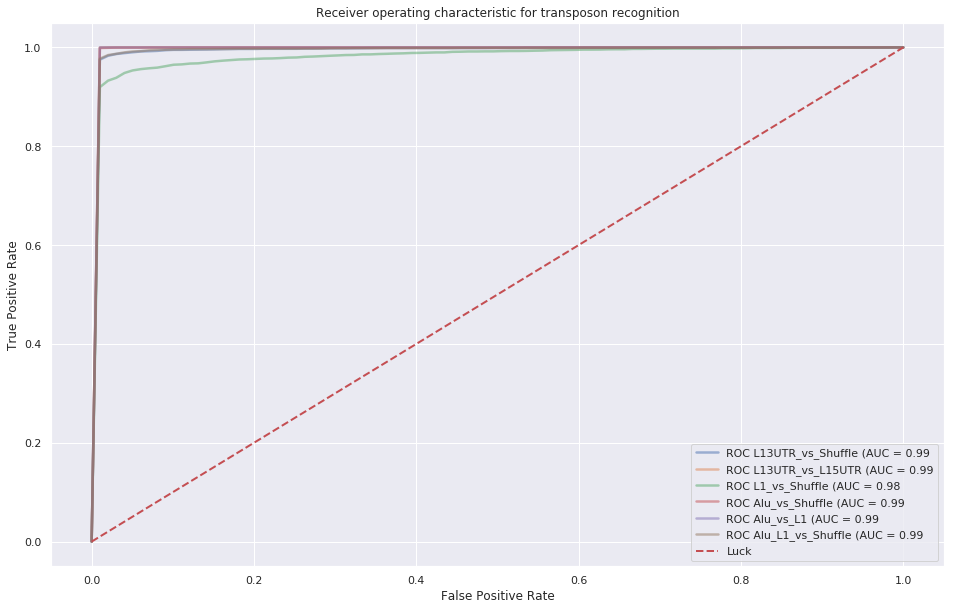

In [27]:
for name, df in zip([
    'L13UTR_vs_Shuffle',
    'L13UTR_vs_L15UTR',
    'L1_vs_Shuffle',
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
],[
    auc_l13utr_vs_random,
    auc_l13utr_vs_l15utr,
    auc_l1_vs_random,
    auc_alu_vs_random,
    auc_alu_vs_l1,
    auc_alu_l1_vs_random,
    # Add more experiments here
]):
    auc_score = auc(df.fpr, df.tpr)
    plt.plot(
        df.fpr,
        df.tpr,
        lw=2.5,
        alpha=0.5,
        label=f'ROC {name} (AUC = {auc_score:0.2f}'
    )
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    lw=2,
    color='r',
    label='Luck',
    alpha=1.0
)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Precision recall

In [28]:
pr_l13utr_vs_random = pd.read_csv('L1/Precision-Recall__L13UTR_vs_Shuffle__50b.p._Stats.csv')
pr_l13utr_vs_l15utr = pd.read_csv('L1/Precision-Recall__L13UTR_vs_L15UTR__50b.p._Stats.csv')
pr_l1_vs_random = pd.read_csv('L1/Precision-Recall__L1_vs_Shuffle__50b.p._Stats.csv')
pr_alu_vs_random = pd.read_csv('Alu/Precision-Recall__Alu_vs_Shuffle__50b.p._Stats.csv')
pr_alu_vs_l1 = pd.read_csv('Alu/Precision-Recall__Alu_vs_L1__50b.p._Stats.csv')
pr_alu_l1_vs_random = pd.read_csv('Alu/Precision-Recall__Alu_L1_vs_Shuffle__50b.p._Stats.csv')
# Add more experiments here

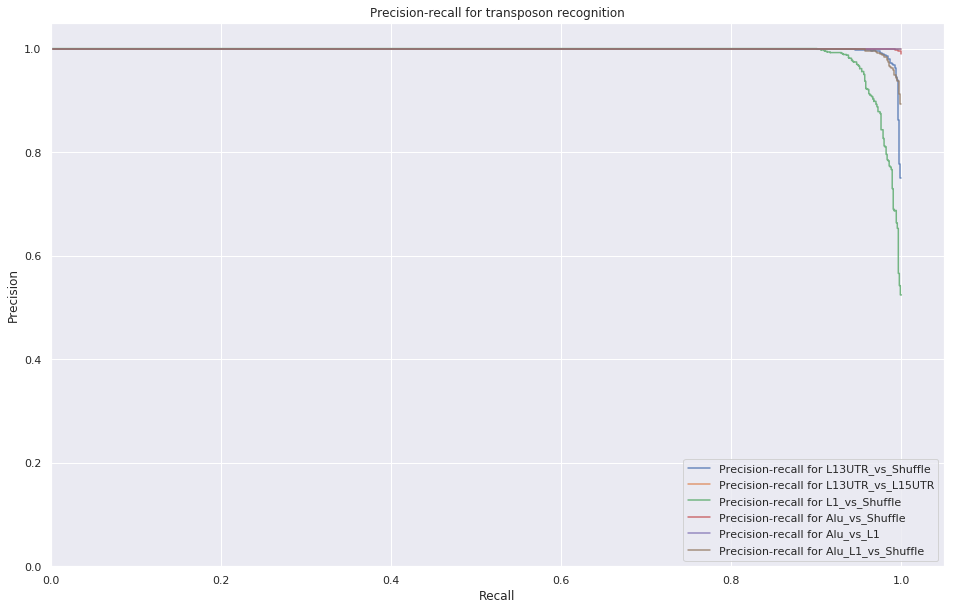

In [29]:
for name, df in zip([
    'L13UTR_vs_Shuffle',
    'L13UTR_vs_L15UTR',
    'L1_vs_Shuffle',
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
],[
    pr_l13utr_vs_random,
    pr_l13utr_vs_l15utr,
    pr_l1_vs_random,
    pr_alu_vs_random,
    pr_alu_vs_l1,
    pr_alu_l1_vs_random,
    # Add more experiments here
]):
    plt.step(
        df.recall,
        df.precision,
        alpha=0.8,
        where='post',
        label=f'Precision-recall for {name}'
    )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-recall for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Feature importances

In [30]:
fi_l13utr_vs_random = pd.read_csv('L1/Feature_importance__L13UTR_vs_Shuffle__50b.p._Stats.csv')
fi_l13utr_vs_l15utr = pd.read_csv('L1/Feature_importance__L13UTR_vs_L15UTR__50b.p._Stats.csv')
fi_l1_vs_random = pd.read_csv('L1/Feature_importance__L1_vs_Shuffle__50b.p._Stats.csv')
fi_alu_vs_random = pd.read_csv('Alu/Feature_importance__Alu_vs_Shuffle__50b.p._Stats.csv')
fi_alu_vs_l1 = pd.read_csv('Alu/Feature_importance__Alu_vs_L1__50b.p._Stats.csv')
fi_alu_l1_vs_random = pd.read_csv('Alu/Feature_importance__Alu_L1_vs_Shuffle__50b.p._Stats.csv')
# Add more experiments here

In [31]:
top_features = pd.unique(pd.concat([
    fi_l13utr_vs_random.iloc[:10],
    fi_l13utr_vs_l15utr.iloc[:10],
    fi_l1_vs_random.iloc[:10],
    fi_alu_vs_random.iloc[:10],
    fi_alu_vs_l1.iloc[:10],
    fi_alu_l1_vs_random.iloc[:10],
    # Add more experiments here
]).Feature_name)
to_plot_df = pd.concat([
    fi_l13utr_vs_random[fi_l13utr_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_l13utr_vs_l15utr[fi_l13utr_vs_l15utr.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_l1_vs_random[fi_l1_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_vs_random[fi_alu_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_vs_l1[fi_alu_vs_l1.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_l1_vs_random[fi_alu_l1_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    # Add more experiments here
], axis=1).fillna(0)
to_plot_df.columns=EXPERIMENTS
to_plot_df = to_plot_df.sort_values(to_plot_df.columns[0], ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



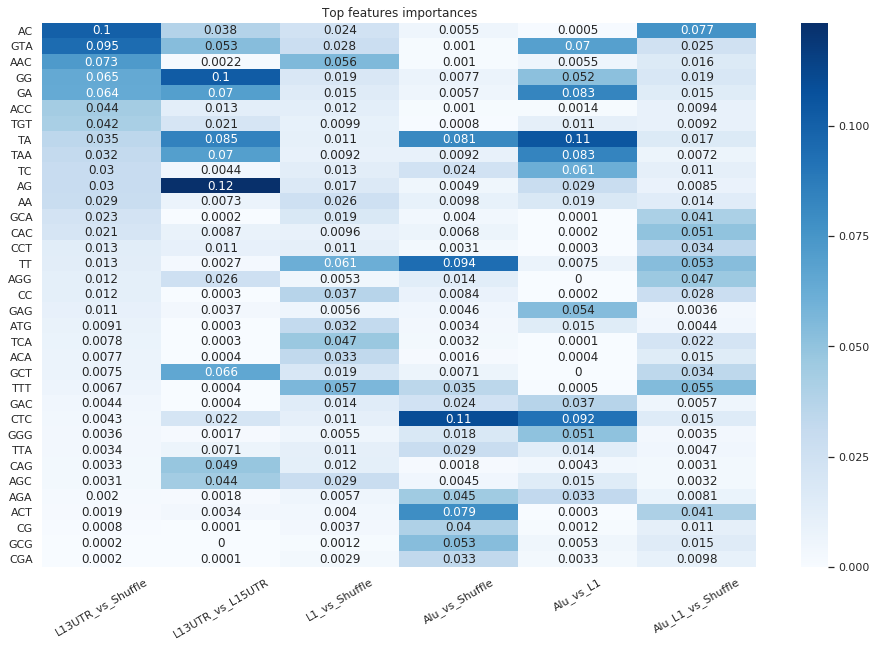

In [32]:
ax = plt.axes()
sns.heatmap(to_plot_df, annot=True, cmap='Blues');
ax.set_title('Top features importances');
plt.xticks(rotation=30);

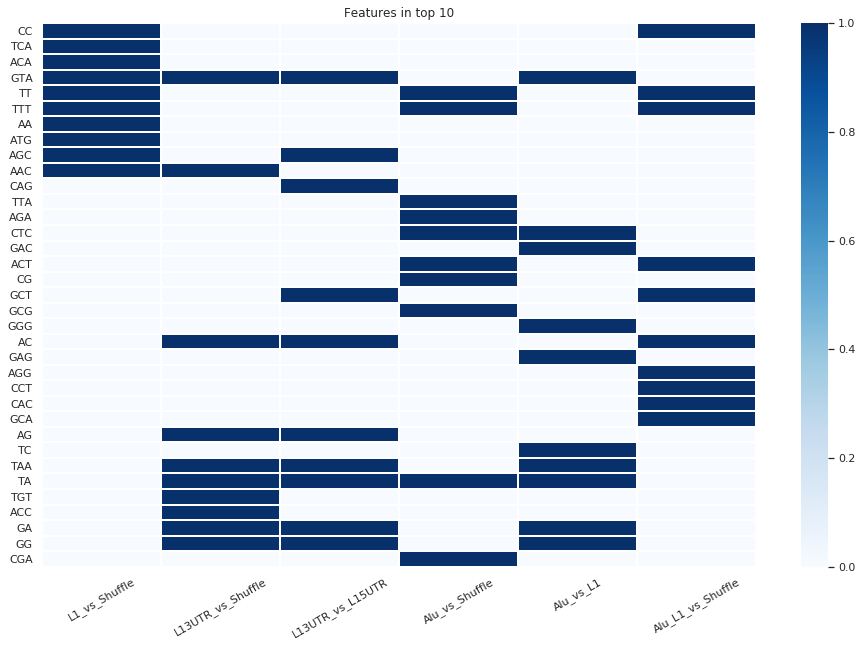

In [33]:
all_features = to_plot_df.index
top_10_experiment_features = {
    'L13UTR_vs_Shuffle': fi_l13utr_vs_random.iloc[:10].Feature_name.tolist(),
    'L13UTR_vs_L15UTR': fi_l13utr_vs_l15utr.iloc[:10].Feature_name.tolist(),
    'L1_vs_Shuffle': fi_l1_vs_random.iloc[:10].Feature_name.tolist(),
    'Alu_vs_Shuffle': fi_alu_vs_random.iloc[:10].Feature_name.tolist(),
    'Alu_vs_L1': fi_alu_vs_l1.iloc[:10].Feature_name.tolist(),
    'Alu_L1_vs_Shuffle': fi_alu_l1_vs_random.iloc[:10].Feature_name.tolist(),
    }
lines = []
for feature in all_features:
    lines.append({key: feature in top_10_experiment_features[key] and 1 or 0 for key in top_10_experiment_features})

binary_hm_df = pd.DataFrame(lines)
binary_hm_df.index = all_features
binary_hm_df = binary_hm_df[list(reversed(binary_hm_df.columns))]
binary_hm_df = binary_hm_df.sort_values('L1_vs_Shuffle', ascending=False)
ax = plt.axes()
sns.heatmap(binary_hm_df, cmap='Blues', linewidths=1)
ax.set_title('Features in top 10')
plt.xticks(rotation=30);